In [2]:
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
# To reload local imported modules dynamically
%autoreload 2
plt.rcParams["figure.figsize"] = (20,10)

## Градиентный спуск с фиксированным шагом

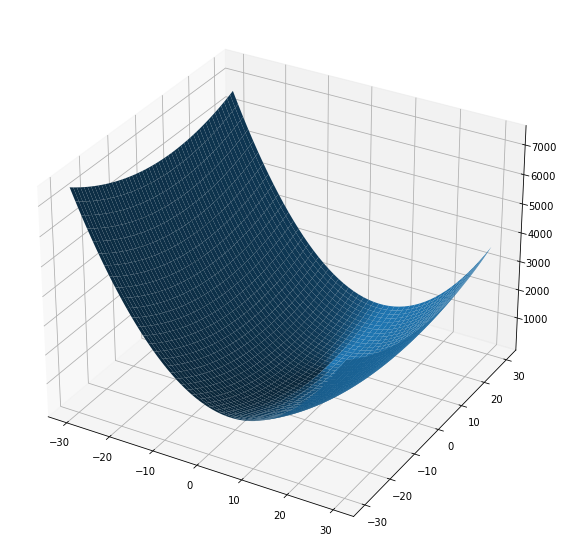

In [3]:
def f(x, y):
    return 5 * (x - 5) ** 2 + (y - 7) ** 2


def grad(x, y):
    return [10 * (x - 5), 2 * (y - 7)]


t = np.linspace(-30, 30, 1000)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f(X, Y))

[[-20.         -20.        ]
 [ -5.         -16.76      ]
 [  1.         -13.9088    ]
 [  3.4        -11.399744  ]
 [  4.36        -9.19177472]
 [  4.744       -7.24876175]
 [  4.8976      -5.53891034]
 [  4.95904     -4.0342411 ]
 [  4.983616    -2.71013217]
 [  4.9934464   -1.54491631]
 [  4.99737856  -0.51952635]
 [  4.99895142   0.38281681]
 [  4.99958057   1.17687879]
 [  4.99983223   1.87565334]
 [  4.99993289   2.49057494]
 [  4.99997316   3.03170594]
 [  4.99998926   3.50790123]
 [  4.99999571   3.92695308]
 [  4.99999828   4.29571871]
 [  4.99999931   4.62023247]]


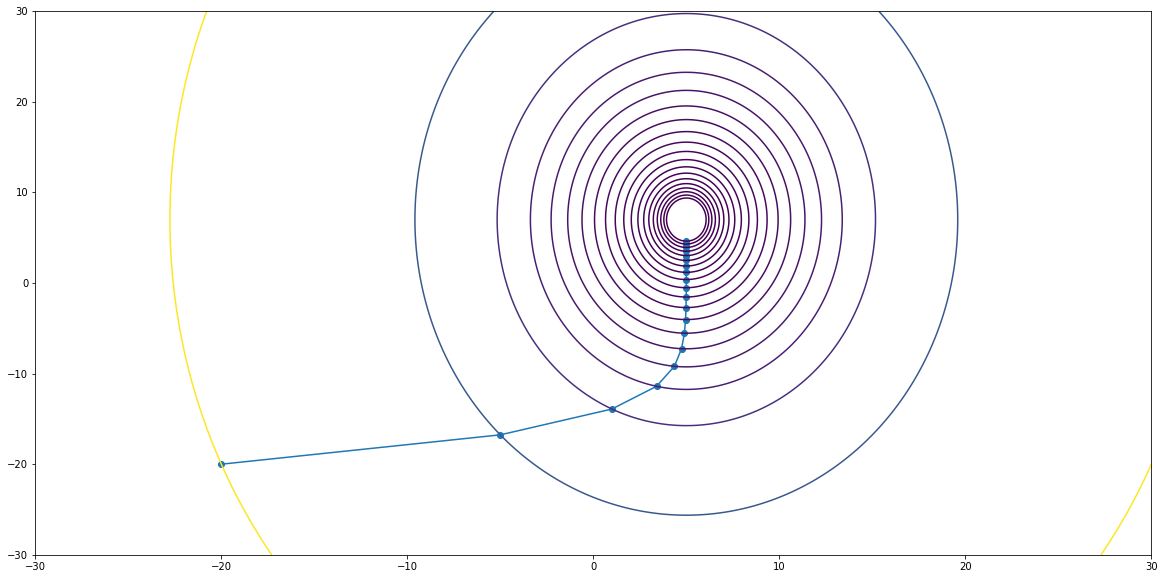

In [4]:
lr = 0.06
epoch = 20
x = [-20, -20]

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - lr * np.array(grad(x[0], x[1]))
    points[i] = x

print(points)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]))

## Экспоненциальный шаг градиентного спуска

[[-20.         -20.        ]
 [  5.         -14.6       ]
 [  5.         -10.32298472]
 [  5.          -6.92699139]
 [  5.          -4.22391407]
 [  5.          -2.06715045]
 [  5.          -0.34216239]
 [  5.           1.04075524]
 [  5.           2.15202784]
 [  5.           3.04707631]
 [  5.           3.76961635]
 [  5.           4.35421075]
 [  5.           4.82824842]
 [  5.           5.21348259]
 [  5.           5.52722914]
 [  5.           5.78330224]
 [  5.           5.99274653]
 [  5.           6.16441149]
 [  5.           6.30540282]
 [  5.           6.42143808]]


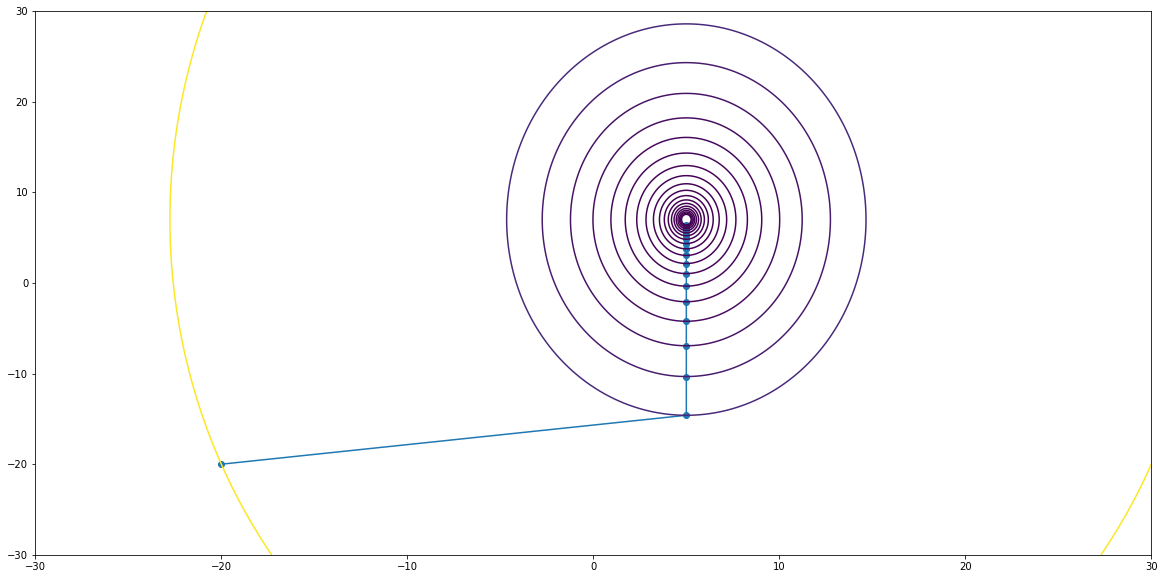

In [5]:
import optimization as opt

epoch = 20
x = [-20, -20]
lr = 0.1

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - lr * np.array(grad(x[0], x[1]))
    lr = opt.exp_decay(lr)
    points[i] = x

print(points)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]))

## Поиск минимума одномерной функции при помощи дихотомии

[[-24.00363078]
 [-11.34590258]
 [ -5.01703848]
 [ -1.85260643]
 [ -0.2703904 ]
 [  0.52071761]
 [  0.91627162]
 [  1.11404862]
 [  1.01516012]
 [  0.96571587]
 [  0.99043799]
 [  1.00279905]
 [  0.99661852]
 [  0.99970879]
 [  1.00125392]
 [  1.00048136]
 [  1.00009507]
 [  0.99990193]
 [  0.9999985 ]
 [  1.00004679]
 [  1.00002264]]


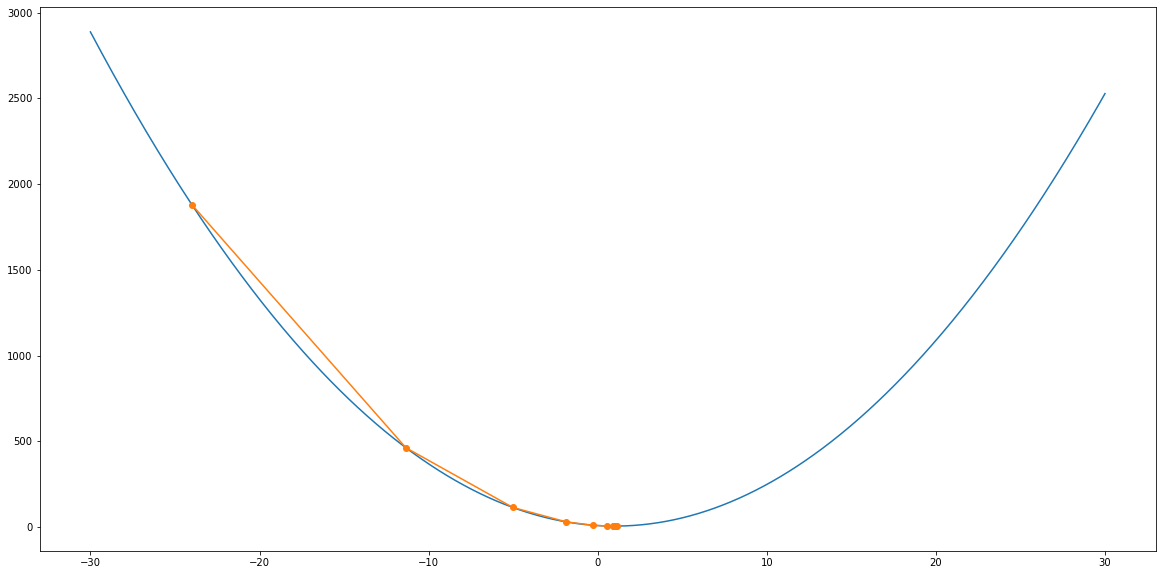

In [54]:
import optimization as opt

def f(x):
    return 3 * (x[0] - 1) ** 2 + 5

x = [-100]

bounds = opt.find_unimodal_interval(f, x)
points = opt.dichotomy(f, bounds, lambda iter, point: iter >= 20, log=True)

print(points)
t = np.linspace(-30, 30, 1000)
plt.plot(t, f([t]))
plt.plot(points, f([points]) , 'o-')

## Градиентный спуск на основе дихотомии

[[0.5        0.5       ]
 [0.78055972 0.35024756]
 [1.80097033 1.57357211]
 [1.81621865 1.56010958]
 [1.82982216 1.55028162]
 [1.84194134 1.54344788]
 [1.91151388 1.51496066]
 [1.94162423 1.58585666]
 [1.95044881 1.58224438]
 [2.00908665 1.56839259]
 [2.01096602 1.57624437]
 [2.02996336 1.62164408]
 [2.03636744 1.61902423]
 [2.07730221 1.61028394]
 [2.07854713 1.61620057]
 [2.0902712  1.64501657]
 [2.09465551 1.64326682]
 [2.12246328 1.63796023]
 [2.12325457 1.64213023]
 [2.13043532 1.66020558]
 [2.13331897 1.65910392]]


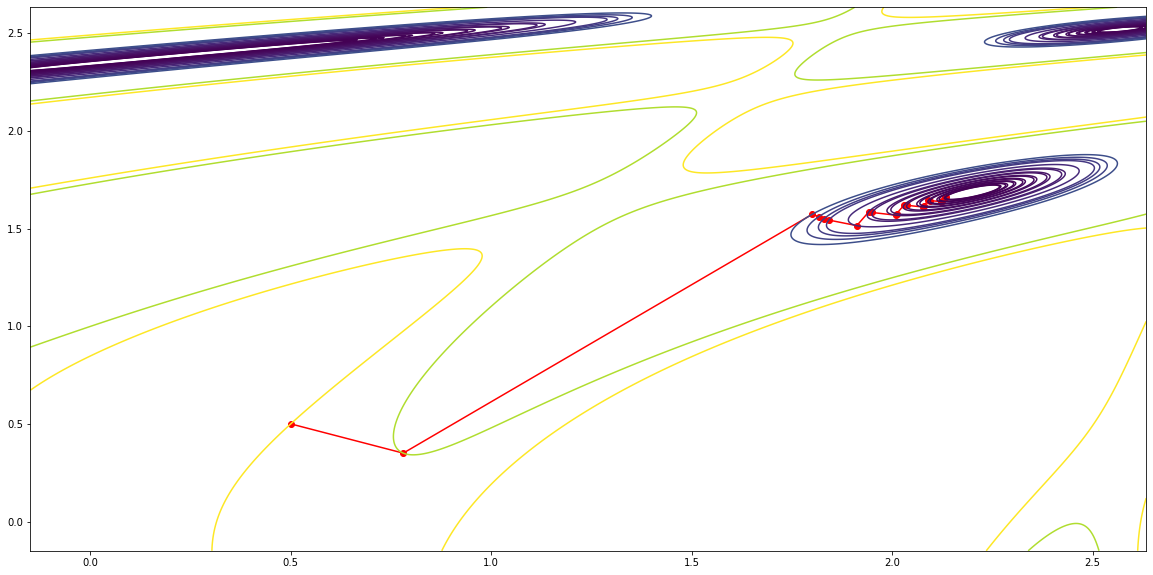

In [36]:
import optimization as opt

def f(x):
    return np.sin(0.5 * x[0]**2 - 0.25 * x[1]**2 + 3)*np.cos(2*x[0]+1-np.exp(x[1]))

epoch = 20
x = [0.5, 0.5]

points = opt.gradient_descent(
    x,
    lambda x: opt.min_in_direction(f, x, -opt.grad(f, x)),
    lambda i, p: i >= epoch
)

print(points)
plt.plot(points[:, 0], points[:, 1], 'o-', color="red")
t = np.linspace(min(*points[:, 0], *points[:, 1]) - 0.5, max(*points[:, 0], *points[:, 1]) + 0.5, 1000)
X = np.meshgrid(t, t)
plt.contour(X[0], X[1], f(X), levels=sorted(list(set([f(p) for p in points]))))

## Поиск минимума одномерной функции с помощью условий Вольфе

[[-5.        ]
 [ 3.36382295]
 [ 4.73229247]
 [ 4.95619831]
 [ 4.99283327]
 [ 4.9988274 ]
 [ 4.99980814]
 [ 4.99996861]
 [ 4.99999486]
 [ 4.99999916]
 [ 5.00000045]]


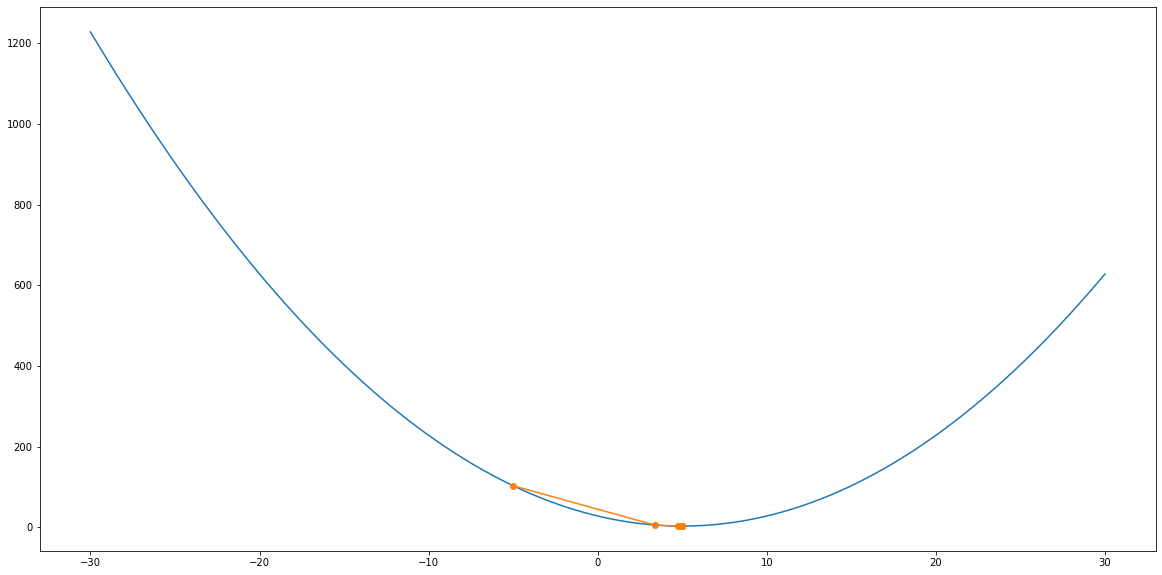

In [51]:
import optimization as opt

def f(x):
    return (x[0]-5)**2 + 3

epoch = 10
x = [-5]

points = opt.gradient_descent(
    x,
    lambda x: opt.min_in_direction(f, x, -opt.grad(f, x),
                                   lambda g, bounds: opt.dichotomy(g, bounds,
                                                                   lambda iter, point: opt.wolfe(point, f, x, -opt.grad(f, x)))),
    lambda i, p: i >= epoch
)

print(points)
t = [np.linspace(-30, 30, 1000)]
plt.plot(t[0], f(t))
plt.plot(points, f([points]) , 'o-')

## Поиск минимума двумерной функции с помощью условий Вольфе

[[0.5        0.5       ]
 [0.71845207 0.38339833]
 [0.83289902 0.37851067]
 [0.81644165 0.50117286]
 [0.91499788 0.51728044]
 [0.90168894 0.6801688 ]
 [0.98461193 0.67785695]
 [1.49353556 1.40335691]
 [1.62493531 1.33047802]
 [1.72686007 1.48273943]
 [1.8334925  1.44862898]
 [1.84716669 1.51915439]
 [2.02030285 1.53300802]
 [2.01444411 1.56497675]
 [2.01649934 1.58286567]
 [2.04353011 1.63219062]
 [2.0563012  1.62477415]
 [2.09928823 1.62158234]
 [2.10076488 1.63260522]
 [2.11890214 1.65948628]
 [2.12622777 1.65495566]]


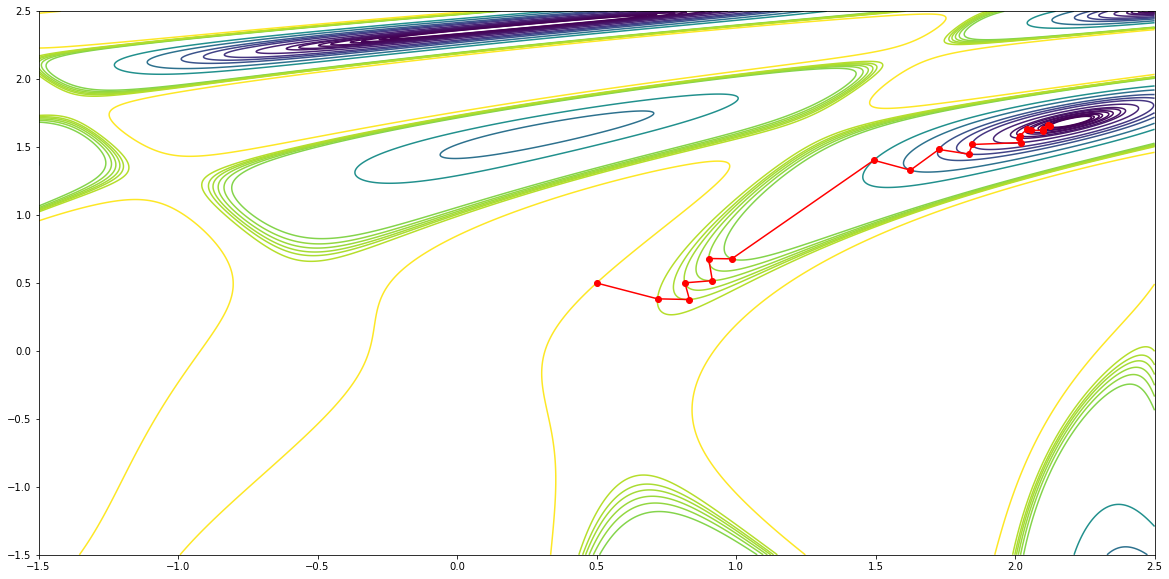

In [50]:
import optimization as opt

def f(x):
    return np.sin(0.5 * x[0]**2 - 0.25 * x[1]**2 + 3)*np.cos(2*x[0]+1-np.exp(x[1]))

epoch = 20
x = [0.5, 0.5]

points = opt.gradient_descent(
    x,
    lambda x: opt.min_in_direction(f, x, -opt.grad(f, x),
                                   lambda g, bounds: opt.dichotomy(g, bounds,
                                                                   lambda iter, point: opt.wolfe(point, f, x, -opt.grad(f, x)))),
    lambda i, p: i >= epoch
)

print(points)
t = np.linspace(-1.5, 2.5, 1000)
X = np.meshgrid(t, t)
plt.contour(X[0], X[1], f(X), levels=sorted([f(p) for p in points]))
plt.plot(points[:, 0], points[:, 1], 'o-', color="red")

## Поиск минимума функции многих переменных с помощью условий Вольфе

[[-5.          5.          1.        ]
 [ 1.593472    1.0439168   4.76769829]
 [ 1.97639071 -0.67636722  5.6962865 ]
 [ 2.02750839 -2.39588644  6.22235507]
 [ 2.00159756 -2.17214934  6.05480171]
 [ 2.00009278 -2.07485832  6.01350645]
 [ 1.9998919  -1.97761056  5.99011164]
 [ 1.99999372 -1.99026406  5.99756291]
 [ 2.00000731 -2.00291193  6.00178424]
 [ 2.00000042 -2.00126624  6.00043975]
 [ 2.00000002 -2.00055062  6.00010838]
 [ 1.99999997 -1.99983532  5.99992065]
 [ 2.         -1.99992839  5.99998044]
 [ 2.         -1.99997372  5.99999695]
 [ 2.         -2.00000786  6.00000223]
 [ 2.         -2.00000288  6.00000035]
 [ 2.         -1.99999914  5.99999975]
 [ 2.         -1.99999968  5.99999996]
 [ 2.         -2.00000001  6.00000002]
 [ 2.         -1.99999999  5.99999998]
 [ 2.         -2.          6.        ]]


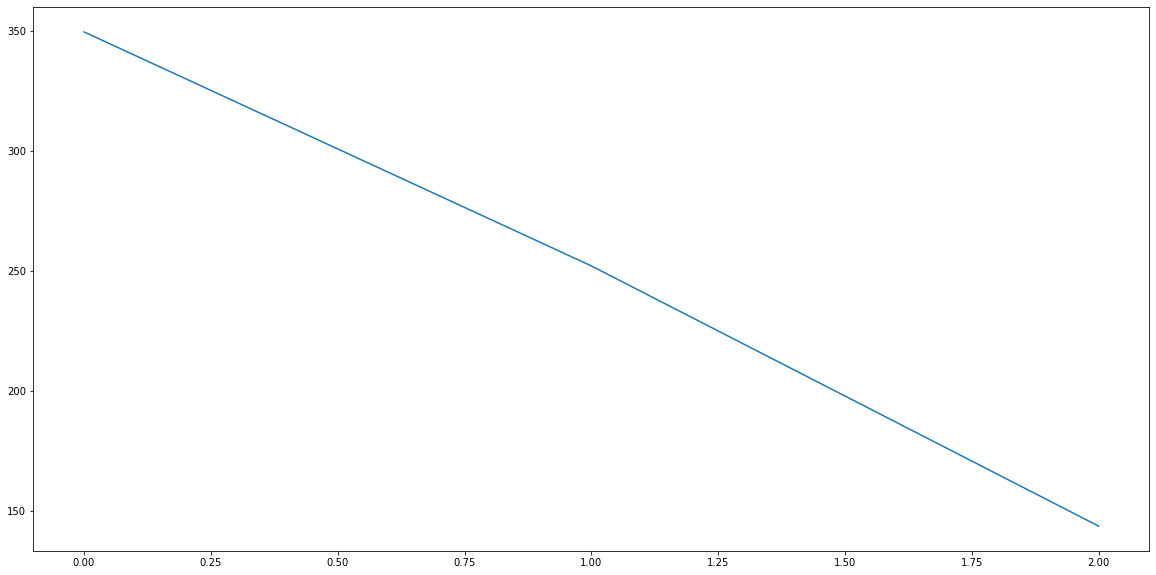

In [45]:
import optimization as opt

def f(x):
    return 5 * (x[0] - 2)**2 + 3 * (x[1] + 2) ** 2 + 4 * (x[2] - 6) ** 2 + 1

epoch = 20
x = [-5, 5, 1]

points = opt.gradient_descent(
    x,
    lambda x: opt.min_in_direction(f, x, -opt.grad(f, x),
                                   lambda g, bounds: opt.dichotomy(g, bounds,
                                                                   lambda iter, point: opt.wolfe(point, f, x, -opt.grad(f, x)))),
    lambda i, p: i >= epoch
)

print(points)
plt.plot(f(points))

## Генерация случайной квадратичной функции от 2 переменных

[[ 2.         -3.        ]
 [ 2.8        -2.84      ]
 [ 3.7024     -2.8336    ]
 [ 4.74816    -2.972608  ]
 [ 5.98348288 -3.25669632]
 [ 7.46191155 -3.69298217]
 [ 9.24669455 -4.29601087]
 [11.41352741 -5.08812026]
 [14.05379104 -6.1001854 ]
 [17.27842727 -7.37276231]
 [21.22261761 -8.9576687 ]]


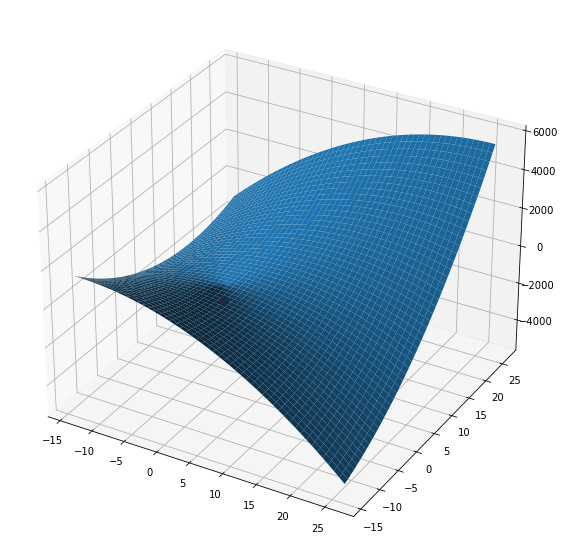

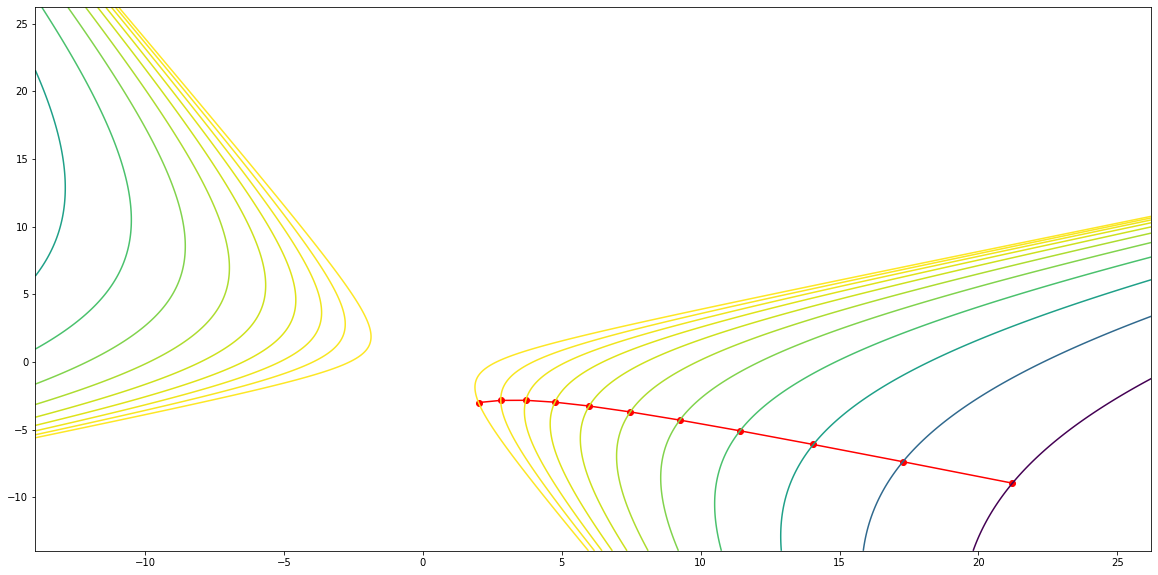

In [46]:
import optimization as opt
f = opt.gen_quadratic_function(2, 10)

epoch = 10
x = [2, -3]

points = opt.gradient_descent(
    x,
    lambda x: x - 0.02 * opt.grad(f, x),
    lambda iteration, p: iteration >= epoch
)


print(points)
t = np.linspace(min(*points[:, 0], *points[:, 1]) - 5, max(*points[:, 0], *points[:, 1]) + 5, 1000)
X = np.meshgrid(t, t)
ax1 = plt.figure().add_subplot(projection='3d')
ax1.plot_surface(X[0], X[1], f(X))
ax1.scatter(points[0][0], points[0][1], f(points[0]), color='red', linewidths=5)
ax2 = plt.figure().add_subplot()
ax2.plot(points[:, 0], points[:, 1], 'o-', color="red")
ax2.contour(X[0], X[1], f(X), levels=sorted([f(p) for p in points]))